In [91]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
from datetime import timedelta
import re
from textblob import TextBlob 


In [119]:
def analisePolaridade(texto): 
    analysis = TextBlob(limparTexto(texto)) 
    if analysis.sentiment.polarity > 0: 
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 0
    else: 
        return -1

def limparTexto(texto): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", texto).split()) 



url = 'https://min-api.cryptocompare.com/data/v2/news/?categories=eth&lTs=dataAlvo'
data = datetime.now()
dados = []

def search(lista, valor):
    if [(lista.index(x), x.index(valor)) for x in lista if valor in x] != []:
        return 1
    else:
        return 0

for i in range(90):
    url = url.replace('dataAlvo', str(data.strftime("%s")))
    j = requests.get(url).json()
    for resultado in j['Data']:
        #print(type(resultado['id']))
        #print(url)
        if (search(dados, resultado['id'])==0):
            dados.append([
                resultado['id'],
                resultado['published_on'],
                resultado['title'],
                resultado['source'],
                resultado['body'],
                analisePolaridade(str(resultado['title'])),
                resultado['categories'],
            ])
    url = url.replace(str(data.strftime("%s")), 'dataAlvo')
    #print(data)
    data = data - timedelta(days=1)
    
     
df = pd.DataFrame(dados, columns=['id', 'data','titulo','fonte', 'noticia', 'polaridade', 'categoria'])
print(df.shape)
print(df.head())

(276, 7)
       id        data                                             titulo  \
0  701398  1542236400  Rosetta Coffee Company Now Accepts Cryptocurre...   
1  701374  1542234063  Crypto Markets Drop Significantly Due to Coinb...   
2  701355  1542231664  Bitcoin Dips To Its Lowest Level This Year, Et...   
3  701347  1542230280  Bitcoin, Ethereum, Ripple, Bitcoin Cash, EOS, ...   
4  701317  1542227726  ‘One Blockchain’: Ambitious Crypto Project Kin...   

           fonte                                            noticia  \
0    cryptoglobe  Rosetta Coffee, a Lynchburg, Virginia-based “s...   
1      themerkle  Crytpocurrency markets are in turmoil right no...   
2      themerkle  It’s been a bearish year for the cryptocurrenc...   
3  cointelegraph  Should traders start bottom fishing following ...   
4            ccn  The developers of Kin, the cryptocurrency crea...   

   polaridade                   categoria  
0           1            BTC|ETH|LTC|DASH  
1          -1  BTC|

In [130]:
df['dataFormat'] = df['data'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))

df.head()
df.shape[0]

df['moeda'] = df['data'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))


NameError: name 'o' is not defined

In [129]:
df.head()

,id,data,titulo,fonte,noticia,polaridade,categoria,dataFormat,moeda
0,701398,1542236400,Rosetta Coffee Company Now Accepts Cryptocurre...,cryptoglobe,"Rosetta Coffee, a Lynchburg, Virginia-based “s...",1,BTC|ETH|LTC|DASH,2018-11-14,1
1,701374,1542234063,Crypto Markets Drop Significantly Due to Coinb...,themerkle,Crytpocurrency markets are in turmoil right no...,-1,BTC|ETH|Market|Trading|XRP,2018-11-14,1
2,701355,1542231664,"Bitcoin Dips To Its Lowest Level This Year, Et...",themerkle,It’s been a bearish year for the cryptocurrenc...,0,BTC|XRP|ETH|Trading,2018-11-14,1
3,701347,1542230280,"Bitcoin, Ethereum, Ripple, Bitcoin Cash, EOS, ...",cointelegraph,Should traders start bottom fishing following ...,1,BTC|ETH|LTC|XMR|XRP,2018-11-14,1
4,701317,1542227726,‘One Blockchain’: Ambitious Crypto Project Kin...,ccn,"The developers of Kin, the cryptocurrency crea...",1,ETH|ICO,2018-11-14,1


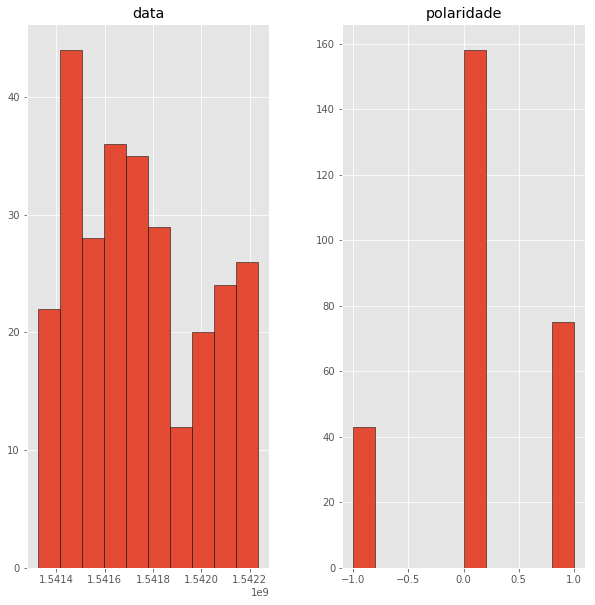

In [122]:
df.hist(edgecolor='black', figsize=(10, 10), grid=True);

In [124]:
print(pd.unique(df['dataFormat']))

['2018-11-14' '2018-11-13' '2018-11-12' '2018-11-11' '2018-11-10'
 '2018-11-09' '2018-11-08' '2018-11-07' '2018-11-06' '2018-11-05'
 '2018-11-04']


In [125]:
print(len(list(df[(df.polaridade == -1)].groupby('dataFormat').count()['polaridade'])))



df_novo = df.pivot_table(index='polaridade', 
                     columns='dataFormat', 
                     values='id',
                     fill_value=0, 
                     aggfunc='count').unstack()

df_novo.head()

listaNova = list(df_novo)
print(listaNova)
divisor = int(len(listaNova) / 3)

tes = np.array(listaNova).reshape(divisor,3)
polar = pd.DataFrame(tes, columns=['neg', 'pos','neutro'])
polar.head()



11
[2, 9, 2, 4, 23, 10, 3, 14, 12, 4, 20, 8, 9, 17, 8, 2, 24, 9, 1, 10, 7, 2, 5, 1, 6, 11, 5, 6, 12, 5, 4, 13, 8]


,neg,pos,neutro
0,2,9,2
1,4,23,10
2,3,14,12
3,4,20,8
4,9,17,8


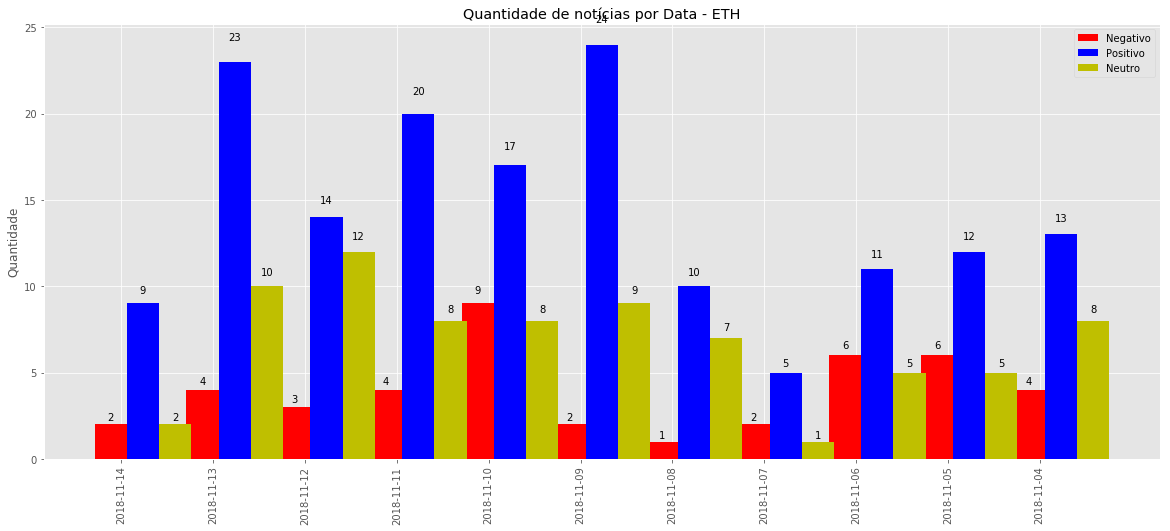

In [127]:
import numpy as np
import matplotlib.pyplot as plt

N = divisor
men_means = list(polar['neg'])


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

rects1 = ax.bar(ind, men_means, width, color='r')

women_means = list(polar['pos'])

rects2 = ax.bar(ind + width, women_means, width, color='b')

w_means = list(polar['neutro'])

rects3 = ax.bar(ind + width + width, w_means, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de notícias por Data - ETH')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels((pd.unique(df['dataFormat'])), rotation='vertical')

ax.legend((rects1[0], rects2[0], rects3[0]), ('Negativo', 'Positivo', 'Neutro'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


plt.show()

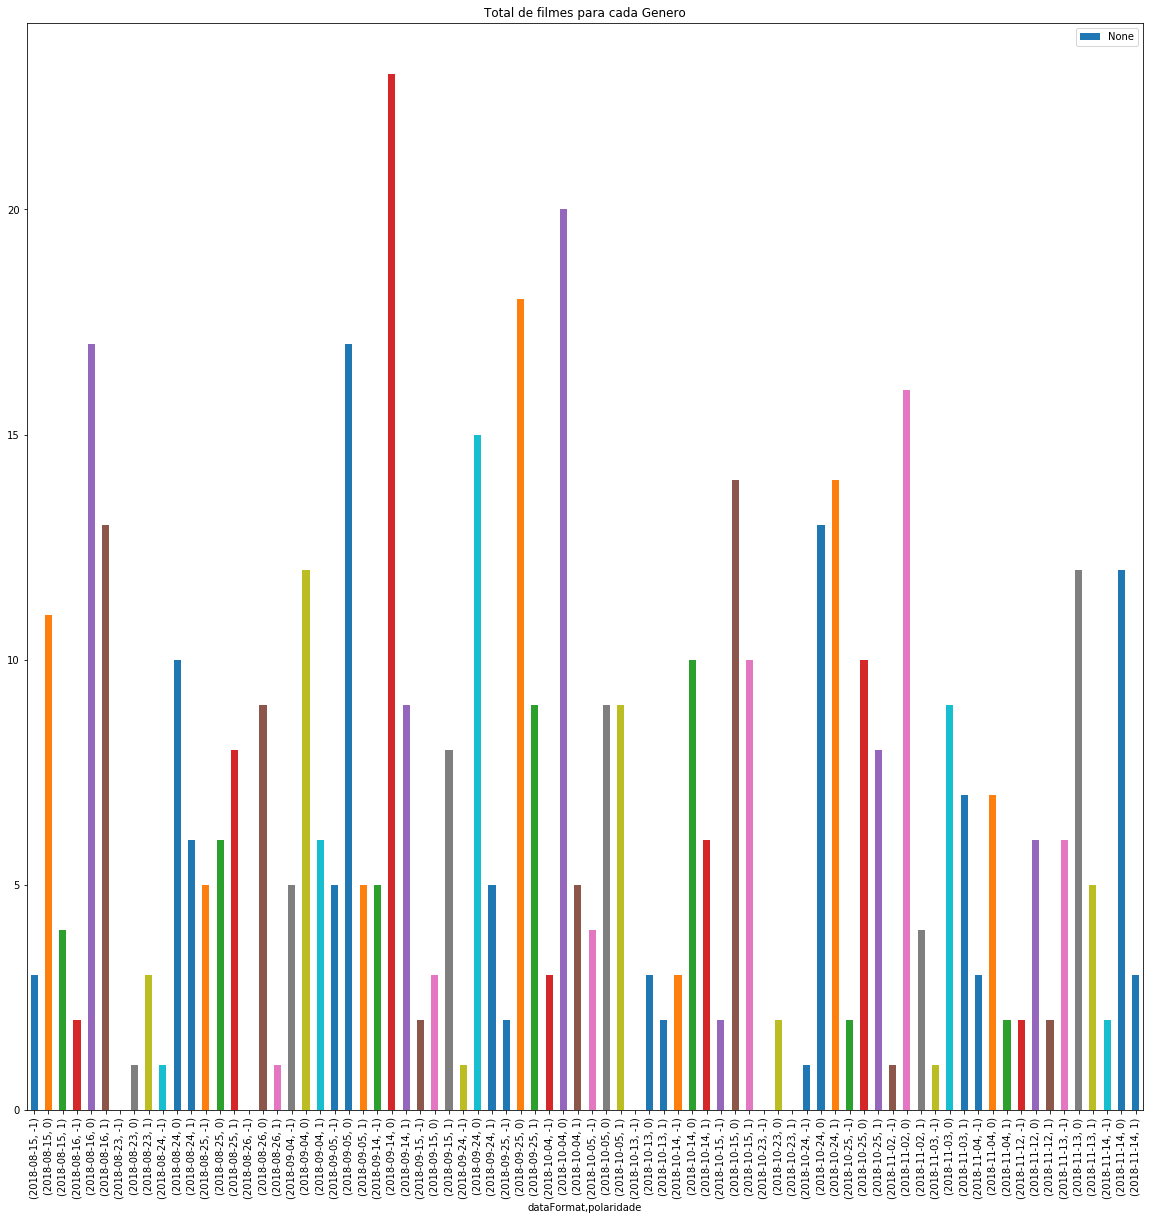

In [28]:
df_novo.plot(kind='bar', title='Total de filmes para cada Genero', figsize=(20, 20), legend=True)